In [4]:
from mp1 import *
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np
from keras import utils as np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import UpSampling2D
from keras.layers import Flatten 

# Simple classfication

In [46]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
y_train = np_utils.to_categorical(Y_train, 3)

Creating data:
0
50
100
150
200
250


In [47]:
model = Sequential()
nb_neurons = 15

model.add(Dense(nb_neurons, input_shape=(5184,)))
model.add(Activation('sigmoid'))
model.add(Dense(3, activation = 'sigmoid'))


sgd = SGD(lr=0.01,
          decay=1e-6, momentum=0.9,
          nesterov=True)
#model.compile(loss='mean_squared_error',
#              optimizer = sgd)

model.compile(loss='categorical_crossentropy',
              optimizer = sgd)
#For adam : epochs = 50, converge plus lentement
#For sgd : epochs = 10

model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
300/300 [==============================] - 0s 1ms/step - loss: 1.0785
Epoch 2/30
300/300 [==============================] - 0s 115us/step - loss: 0.9645
Epoch 3/30
300/300 [==============================] - 0s 119us/step - loss: 0.8642
Epoch 4/30
300/300 [==============================] - 0s 117us/step - loss: 0.7848
Epoch 5/30
300/300 [==============================] - 0s 114us/step - loss: 0.7100
Epoch 6/30
300/300 [==============================] - 0s 118us/step - loss: 0.6573
Epoch 7/30
300/300 [==============================] - 0s 121us/step - loss: 0.5982
Epoch 8/30
300/300 [==============================] - 0s 120us/step - loss: 0.5492
Epoch 9/30
300/300 [==============================] - 0s 113us/step - loss: 0.4935
Epoch 10/30
300/300 [==============================] - 0s 106us/step - loss: 0.4426
Epoch 11/30
300/300 [==============================] - 0s 106us/step - loss: 0.4087
Epoch 12/30
300/300 [==============================] - 0s 107us/step - loss: 0.3788
Epo

In [48]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0.25966325, 0.00856415, 0.00336176]], dtype=float32)

Working with sgd gives a better solution. Adam take more steps to converge according to the loss. That's why we are working with sgd on this example.

# Visualization of the Solution

[[0.62424994 0.01201011 0.01890638]]
(5184, 5)


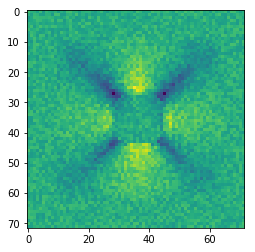

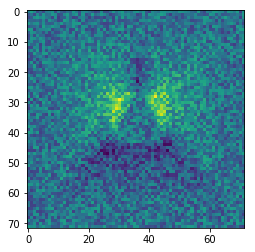

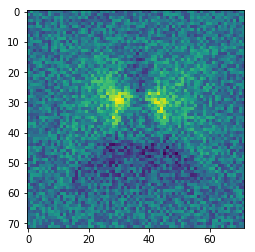

In [5]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
print(model.predict(X_test))

print(model.get_weights()[0].shape)

for i in range(3):
    plt.imshow(model.get_weights()[0][:, i].reshape((72,72)))
    plt.show()

As we can see on this example, we can visualize shapes on this example. However, we cannot distinguish the rectangle or the triangle directly.

# A more difficult classification problem

In [13]:
n = 1000
[X_train, Y_train] = generate_dataset_classification(n, 20, True)
new_X_train = X_train.reshape(n, 72, 72, 1)

print(new_X_train.shape)

y_train = np_utils.to_categorical(Y_train, 3)

Creating data:
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
(1000, 72, 72, 1)


In [18]:
model = Sequential()

model.add(Conv2D(16, (5, 5), activation='relu',
          input_shape=(72, 72, 1)))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation = 'sigmoid'))

sgd = SGD(lr=0.01,
          decay=1e-6, momentum=0.9,
          nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer = sgd,
              metrics = ['accuracy'])


model.fit(new_X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0826 - acc: 0.3920
Epoch 2/30
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0010 - acc: 0.5090
Epoch 3/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8682 - acc: 0.5900
Epoch 4/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7737 - acc: 0.6470A: 0s - loss: 0.7727 - acc: 0.649
Epoch 5/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7753 - acc: 0.6470
Epoch 6/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6914 - acc: 0.6900
Epoch 7/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6393 - acc: 0.7260
Epoch 8/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5927 - acc: 0.7630
Epoch 9/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5373 - acc: 0.7680
Epoch 10/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5419 - acc: 0.7

In [19]:
[X_test, Y_test] = generate_test_set_classification()
new_X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
res = model.evaluate(new_X_test, Y_test)
print("Loss : ", res[0])
print("Accuracy : ", res[1])

Creating data:
0
50
100
150
200
250
300/300 [==============================] - 0s 1ms/step
Loss :  0.4719576327006022
Accuracy :  0.8733333333333333


# A regression problem

In [26]:
n = 1000
[X_train, Y_train] = generate_dataset_regression(n, 20)

new_Y_train = np.zeros((n, 6))
c = 0
for y in Y_train :
    new_y = []
    a = np.array(y)
    y = a.reshape((3,2))
    y = sorted(y, key = lambda a_entry : a_entry[0])
    for arr in y:
        new_y.append(arr[0])
        new_y.append(arr[1])
    new_Y_train[c] = np.array(new_y)
    
    c += 1

new_X_train = X_train.reshape(n, 72, 72, 1)

Creating data:
0
100
200
300
400
500
600
700
800
900


In the data, a triangle is defined with three points. However, if we change the order of the three points, we still have the same triangle but with another dataset. To avoid this, we have to be sure that there is a bijection between 3 points and a triangle. In order to do so, we add an order by sorting them according to the first variable.

In [31]:
model = Sequential()


model.add(Conv2D(32, (5, 5), activation='relu',
          input_shape=(72, 72, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu',
          input_shape=(72, 72, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6))


sgd = SGD(lr=0.01,
          decay=1e-6, momentum=0.9,
          nesterov=True)
#model.compile(loss='mean_squared_er

model.compile(loss='mean_squared_error',
              optimizer = sgd,
              metrics = ['accuracy'])
              

model.fit(new_X_train, new_Y_train, epochs=100, batch_size=32)

Epoch 1/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1105 - acc: 0.3880
Epoch 2/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0730 - acc: 0.4540
Epoch 3/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0636 - acc: 0.4730
Epoch 4/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0538 - acc: 0.4940
Epoch 5/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0478 - acc: 0.5320
Epoch 6/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0441 - acc: 0.5350
Epoch 7/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0415 - acc: 0.5410
Epoch 8/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0403 - acc: 0.5420
Epoch 9/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0379 - acc: 0.5610
Epoch 10/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0364 - acc: 0.5620
Epoch 11/100
1000/1

1000/1000 [==============================] - 6s 6ms/step - loss: 0.0146 - acc: 0.7300
Epoch 83/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0144 - acc: 0.7320
Epoch 84/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0144 - acc: 0.7230
Epoch 85/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0144 - acc: 0.7280
Epoch 86/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0137 - acc: 0.7250
Epoch 87/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0144 - acc: 0.7300
Epoch 88/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0137 - acc: 0.7330
Epoch 89/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0140 - acc: 0.7240
Epoch 90/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0137 - acc: 0.7480
Epoch 91/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0133 - acc: 0.7310
Epoch 92/100
1000/1000 

Creating data:
0


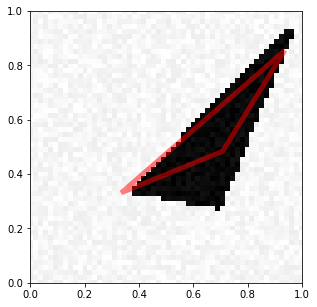

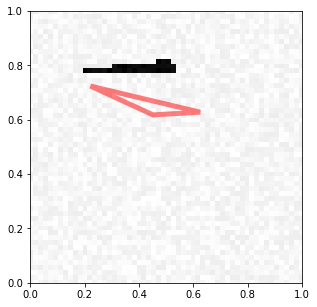

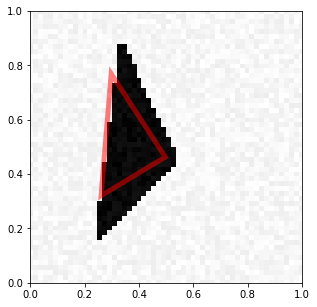

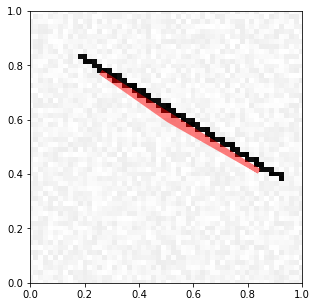

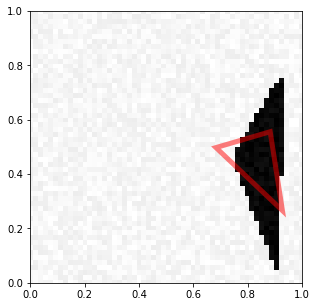

100/100 [==============================] - 0s 3ms/step
Loss :  0.016039616167545317
Accuracy :  0.75


In [32]:
[X_test, Y_test] = generate_test_set_regression()

new_Y_test = np.zeros((Y_test.shape[0], 6))
c = 0
for y in Y_test :
    new_y = []
    a = np.array(y)
    y = a.reshape((3,2))
    y = sorted(y, key = lambda a_entry : a_entry[0])
    for arr in y:
        new_y.append(arr[0])
        new_y.append(arr[1])
    new_Y_test[c] = np.array(new_y)
    
    c += 1

for i in range(10):
    new_X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
    visualize_prediction(X_test[i], model.predict(new_X_test[i].reshape(1, 72, 72, 1)))
    
    
new_X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
res = model.evaluate(new_X_test, new_Y_test)
print("Loss : ", res[0])
print("Accuracy : ", res[1])

Thnaks to the ordering, we manage to get a pretty good accuracy even if the prediction isn't exactly as good as the original data.

# Image denoising

In [6]:
n = 500
[X_train, Y_train] = generate_dataset_denoising(n, noise=20.0)

new_X_train = X_train.reshape(n, 72, 72, 1)
new_Y_train = Y_train.reshape(n, 72, 72, 1)

Creating data:
0
100
200
300
400


In [9]:
seqmodel = Sequential()
seqmodel.add(Conv2D(32, (3, 3), padding='same', input_shape=(72, 72, 1)))
seqmodel.add(Activation('relu'))
seqmodel.add(MaxPooling2D((2, 2)))

seqmodel.add(Conv2D(32, (3, 3), padding='same'))
seqmodel.add(Activation('relu'))
seqmodel.add(UpSampling2D((2, 2)))
seqmodel.add(Conv2D(1, (3, 3), padding='same'))
seqmodel.add(Activation('sigmoid'))

seqmodel.compile(optimizer='adadelta', loss='mean_squared_error')

seqmodel.fit(new_X_train,
             new_Y_train,
             epochs=30,
             batch_size=32,
             shuffle=True,
             validation_split=.20)

Train on 400 samples, validate on 100 samples
Epoch 1/30
400/400 [==============================] - 5s 13ms/step - loss: 0.0932 - val_loss: 0.0267
Epoch 2/30
400/400 [==============================] - 5s 13ms/step - loss: 0.0242 - val_loss: 0.0242
Epoch 3/30
400/400 [==============================] - 5s 13ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 4/30
400/400 [==============================] - 5s 12ms/step - loss: 0.0210 - val_loss: 0.0207
Epoch 5/30
400/400 [==============================] - 5s 13ms/step - loss: 0.0188 - val_loss: 0.0177
Epoch 6/30
400/400 [==============================] - 5s 13ms/step - loss: 0.0154 - val_loss: 0.0133
Epoch 7/30
400/400 [==============================] - 6s 14ms/step - loss: 0.0108 - val_loss: 0.0084
Epoch 8/30
400/400 [==============================] - 6s 14ms/step - loss: 0.0070 - val_loss: 0.0057
Epoch 9/30
400/400 [==============================] - 6s 14ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 10/30
400/400 [========================

Creating data:
0


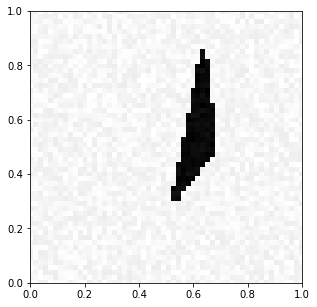

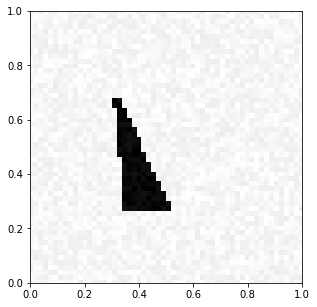

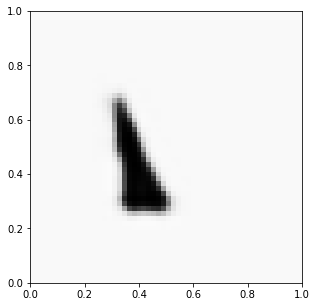

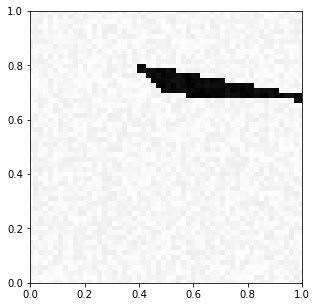

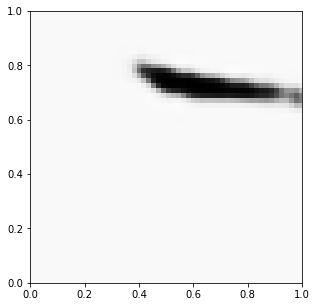

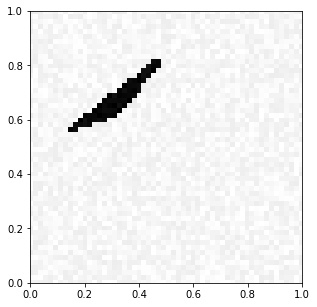

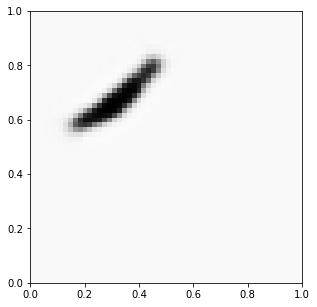

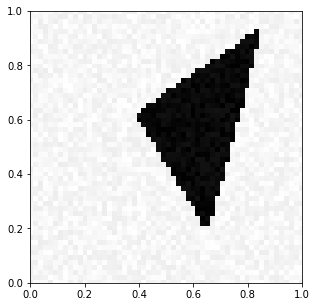

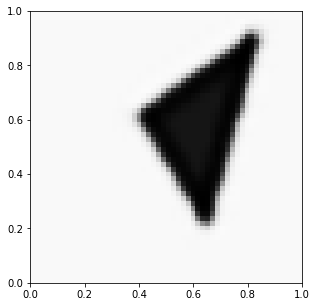

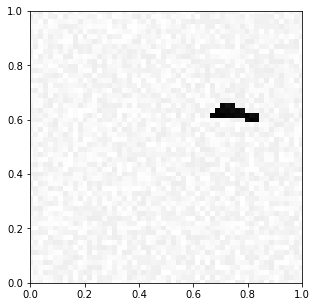

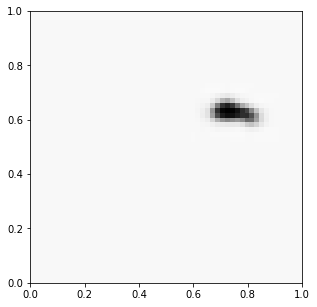

In [25]:
n = 10
[X_test, Y_test] = generate_dataset_denoising(n, noise=20.0)

new_X_test = X_test.reshape(n, 72, 72, 1)
new_Y_test = Y_test.reshape(n, 72, 72, 1)

for i in range(5):
    y = new_Y_test[i]
    fig, ax = plt.subplots(figsize=(5, 5))
    I = y.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])



    x_test = new_X_test[i].reshape(1, 72, 72, 1)
    f1 = seqmodel.predict(x_test)

    fig, ax = plt.subplots(figsize=(5, 5))
    I = f1.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

plt.show()

As we can see on these few example, the denoising is pretty good. However, the outline isn't exact even if we are able to recongnize the original shape.